<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.2 Continunity and Differentiation**
Important Topics:
* Limits and Continuity
* Derivatives
* Taylor’s Theorem

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sympy as sp

#### **Limits and Continuity**:


Example 1:\
 $lim_{x→0} \frac{1 - cos(x)}{x^2}$

In [122]:
x=sp.Symbol('x')
expr= (1 - sp.cos(x))/(x**2)
lim=sp.limit(expr,x,0)
print("The Limit is:",lim)

The Limit is: 1/2


Example 2:\
 $lim_{x→1} \frac{(x^2−1)}{(x−1)}$

In [123]:
x=sp.Symbol('x')
expr= (x**2 - 1)/(x-1)
lim=sp.limit(expr,x,1)
print("The Limit is:",lim)

The Limit is: 2


Continuous Functions:
 * $lim
_{x→a} f (x) = f (a).$
 * h = g ◦ f ≅ h(x) = g( f (x))

In [124]:
def fog(f, g):
    return lambda x : f(g(x))

def f(x):
  return (x**3 - x)

def g(x):
  return (x-1)

comp_funct = fog(f, g)
comp_funct2 = fog(g, f)

print(f"the composite function, fog, with x = 4 gives the result: {comp_funct(4)}")
print(f"the composite function, gof, with x = 4 gives the result: {comp_funct2(4)}")

the composite function, fog, with x = 4 gives the result: 24
the composite function, gof, with x = 4 gives the result: 59


#### **Derivatives**:
* The derivative of a function of a real variable measures the sensitivity to
change of the function value (output value) with respect to another variable.
* Gives the slope of a curve at a point

derivative of cos(2*x), w.r.t x is -2*sin(2*x)


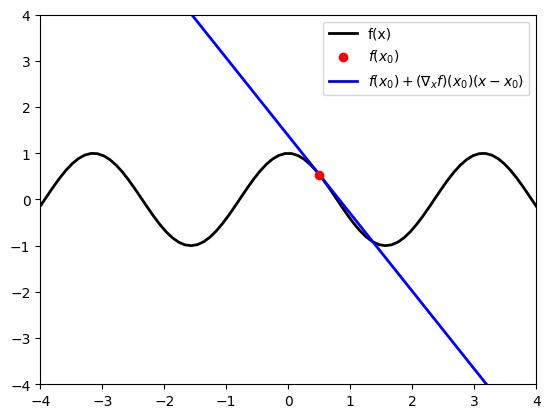

derivative of x**2, w.r.t x is 2*x


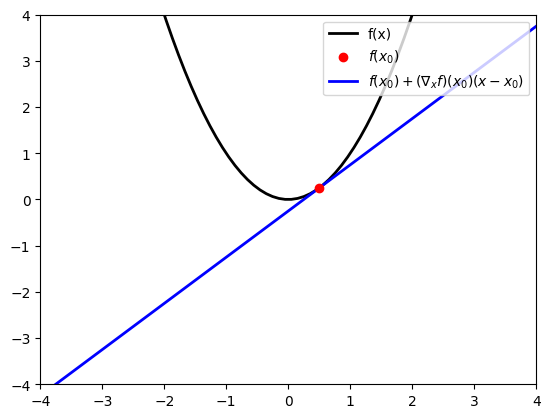

derivative of 4, w.r.t x is 0


In [125]:
x = sp.symbols('x')
xs = np.linspace(-5,5,100)
point = 0.5

expr1 = sp.cos(2 * x)
dif1 = sp.diff(expr1 , x)
print(f"derivative of {expr1}, w.r.t x is {dif1}")

fLam = sp.lambdify('x' , expr1)
fdLam = sp.lambdify('x', dif1)
derived = fLam(point) + (fdLam(point) * (xs - point))

plt.plot(xs, fLam(xs), lw = 2, color = 'k', zorder = 1, label = 'f(x)')
plt.scatter(point, fLam(point), color = 'r', zorder = 2, label = r'$f(x_0)$')
plt.plot(xs, derived, lw = 2, color = 'b', zorder =1, label = r'$f(x_0) + (\nabla_xf)(x_0)(x-x_0)$')
plt.axis([-4, 4, -4, 4])
plt.legend(loc = 1);
plt.show()



expr2 = x**2
dif2 = sp.diff(expr2 , x)
print(f"derivative of {expr2}, w.r.t x is {dif2}")

fLam = sp.lambdify('x' , expr2)
fdLam = sp.lambdify('x', dif2)
derived = fLam(point) + (fdLam(point) * (xs - point))

plt.plot(xs, fLam(xs), lw = 2, color = 'k', zorder = 1, label = 'f(x)')
plt.scatter(point, fLam(point), color = 'r', zorder = 2, label = r'$f(x_0)$')
plt.plot(xs, derived, lw = 2, color = 'b', zorder =1, label = r'$f(x_0) + (\nabla_xf)(x_0)(x-x_0)$')
plt.axis([-4, 4, -4, 4])
plt.legend(loc = 1);
plt.show()



expr3 = 4
dif3 = sp.diff(expr3 , x)
print(f"derivative of {expr3}, w.r.t x is {dif3}")

fLam = sp.lambdify('x' , expr3)
fdLam = sp.lambdify('x', dif3)
derived = fLam(point) + (fdLam(point) * (xs - point))


Partial Derivatives:

In [97]:
y, z = sp.symbols('y , z')

expr4 = (x**3 * sp.cos(y) * z**y)
print(f"partial of {expr4} wrt x is ")
sp.diff(expr4, x)


partial of x**3*z**y*cos(y) wrt x is 


3*x**2*z**y*cos(y)

In [99]:
expr5 = sp.exp(x  * y *  z**y)
print(f"partial of {expr5} wrt x is ")
sp.diff(expr5, x)

partial of exp(x*y*z**y) wrt x is 


y*z**y*exp(x*y*z**y)

Jacobian:


In [126]:
import autograd.numpy as np
from autograd import grad, jacobian

x = np.array([4, 4], dtype = float)

def cost(x):
    return x[0] ** 3 / x[1] - np.log(x[1])

gradient_cost = grad(cost)
jacobian_cost = jacobian(cost)
gradient_cost(x)
jacobian_cost(np.array([x, x, x]))


array([[[12.  ,  0.  ],
        [-4.25,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 0.  , 12.  ],
        [ 0.  , -4.25],
        [ 0.  ,  0.  ]]])

In [127]:
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi

X = Matrix([rho * cos(phi), rho * sin(phi), rho ** 2])

Y = Matrix([rho, phi])

X.jacobian(Y)

Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)],
[   2*rho,             0]])

#### **Taylor’s Theorem**:
* Taylor’s theorem gives an approximation of a differentiable function around
a given point by a polynomial.
* $f (b) = f (a) + (b − a) f ′(a) + 1
2 (b − a)2 f ′′(a) + ... + \frac{(b − a)^{m−1}}{
(m − 1)!} f (m−1)(a) + R_m$

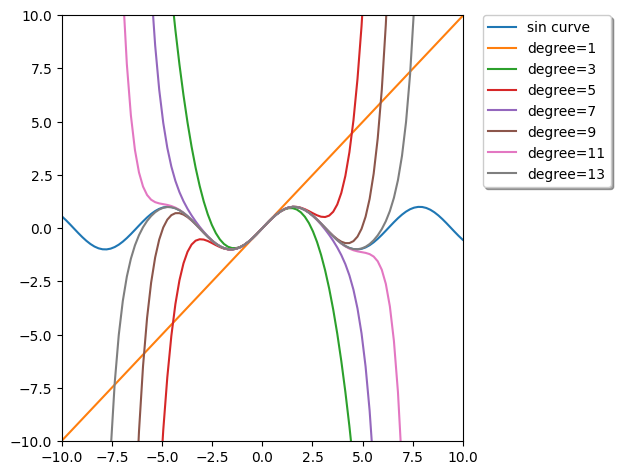

In [128]:
from scipy.interpolate import approximate_taylor_polynomial
x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.sin(x), label="sin curve")
for degree in np.arange(1, 15, step=2):
      sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,order=degree + 2)
      plt.plot(x, sin_taylor(x), label=f"degree={degree}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)

plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()